In [18]:
#required funstions

def matchwise_batsman_totalruns(df):

    #get total runs scored by batsman per match
    match_batsman_runs = df.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index()
    
    return match_batsman_runs

def matchwise_batsman_boundaries(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([4,6])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries = match_batsman_boundaries.rename(columns={'sum':'total_boundary_runs', 'count':'boundary_count'})
    
    return match_batsman_boundaries

def matchwise_batsman_get4(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([4])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries4 = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries4 = match_batsman_boundaries4.rename(columns={'sum':'total_boundary_4s', 'count':'boundary_4_count'})
    
    return match_batsman_boundaries4

def matchwise_batsman_get6(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([6])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries6 = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries6 = match_batsman_boundaries6.rename(columns={'sum':'total_boundary_6s', 'count':'boundary_6_count'})
    
    return match_batsman_boundaries6

def matchwise_batsman_scored123(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([1,2,3])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries = match_batsman_boundaries.rename(columns={'sum':'total_scored123_runs', 'count':'scored123_count'})
    
    return match_batsman_boundaries

def matchwise_batsman_ballsplayed(df):
    
    match_batsman_balls = df.groupby(['match_id', 'batsman'])['ball'].count().reset_index()
    
    return match_batsman_balls

def matchwise_batsman_strikerate(df):
    
    df_strike_rate = matchwise_batsman_totalruns(df).merge(matchwise_batsman_ballsplayed(df), on =['match_id','batsman'])
    df_strike_rate['strike_rate'] = np.round(df_strike_rate['batsman_runs']/df_strike_rate['ball']*100,3)
    return df_strike_rate



    

def matchwise_bowler_totovers(df):    
    
    match_bowler_totovers = df.groupby(['match_id', 'bowler'])['over'].nunique().reset_index()
    
    return match_bowler_totovers

def matchwise_bowler_gaveruns(df):
    
    match_bowler_gaveruns = df.groupby(['match_id', 'bowler'])['total_runs'].sum().reset_index()
    
    return match_bowler_gaveruns

def matchwise_bowler_gaveboundaries(df):
    
    df = df[df.batsman_runs.isin([4,6])]
    
    match_bowler_gaveboundaries = df.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    match_bowler_gaveboundaries = match_bowler_gaveboundaries.rename(columns={'total_runs':'boundary_counts'})
    return match_bowler_gaveboundaries
    
    
def economy_rate(df):

    match_bowler_economyrate =  matchwise_bowler_gaveruns(df).merge(matchwise_bowler_totovers(df), on=['match_id', 'bowler'])
    match_bowler_economyrate['economy_rate'] = match_bowler_economyrate['total_runs']/match_bowler_economyrate['over']
    
    
    return match_bowler_economyrate


def count_balls_toscore(df, score):
    """
    takes dataframe and scores needed by user abd returns array of balls taken to reach score every match
    """
    
    #counting total runs scored per ball
    df['total_runs_cumsum'] = df.groupby('match_id')['total_runs'].cumsum().values
    
    balls_taken = []
    

    #counting balls taken to score 50 runs by kkr team
    for m in df['match_id'].unique():
        df1 = df[df.match_id==m]

        if df1.total_runs_cumsum.isin(range(score,score+5)).any():
            df2 = df1[df1.total_runs_cumsum<=score]
            balls_taken.append(df2.shape[0])
            
        else:
            balls_taken.append(0)
            
    result = pd.DataFrame({'match_id' : df['match_id'].unique().tolist(), 
                          'balls_taken': balls_taken})
            
    return result
    


In [3]:
def matchwise_wickets_total(df):
    
    """
    takes filtered dataframe as input and returns matchwise wickets taken
    """
    
    wickets = df[df.player_dismissed.notnull()]
    
    #get wicket count matchwise
    wickets_count = wickets.groupby('match_id')['player_dismissed'].count().reset_index()
    wickets_count = wickets_count.rename(columns={'player_dismissed':'wicket_count'})

    return wickets_count
    

In [4]:
def get_dot_balls(df):
    """
    take data frame for total team matches and returns dot balls bowled by each bowler per match
    """

    #counting number of dot balls i,e where no wicket is taken neither runs are taken

    #total balls bowled by the bowler
    df_tot_balls = df.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    df_tot_balls = df_tot_balls.rename(columns={'total_runs': 'total_balls'})

    #total dots bowled by the bowler
    df_dots = df[(df.total_runs==0)|(df.player_dismissed==np.nan)]
    df_tot_dots = df_dots.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    df_tot_dots = df_tot_dots.rename(columns={'total_runs': 'total_dots'})

    df_dots_all = df_tot_balls.merge(df_tot_dots, how='left', on=['match_id', 'bowler'])
    
    return df_dots_all

In [5]:
# import data 
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


In [6]:
#delhi's team was earlier know as delhi daredevils, lets make the required changes
deliveries = deliveries.replace('Delhi Daredevils', 'Delhi Capitals')
matches = matches.replace('Delhi Daredevils', 'Delhi Capitals')

## 1. Who will win the match DC or RCB?

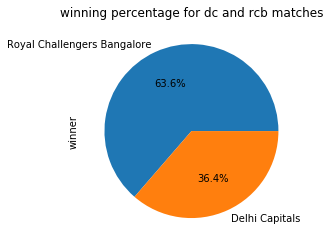

In [7]:
#get matches between dc and rcb
dc_rcb_matches = matches[((matches.team1=='Delhi Capitals')&(matches.team2=='Royal Challengers Bangalore'))|((matches.team2=='Delhi Capitals')&(matches.team1=='Royal Challengers Bangalore'))]

#getting wins count
dc_rcb_matches.winner.value_counts().plot(kind='pie', autopct='%1.1f%%', title="winning percentage for dc and rcb matches")

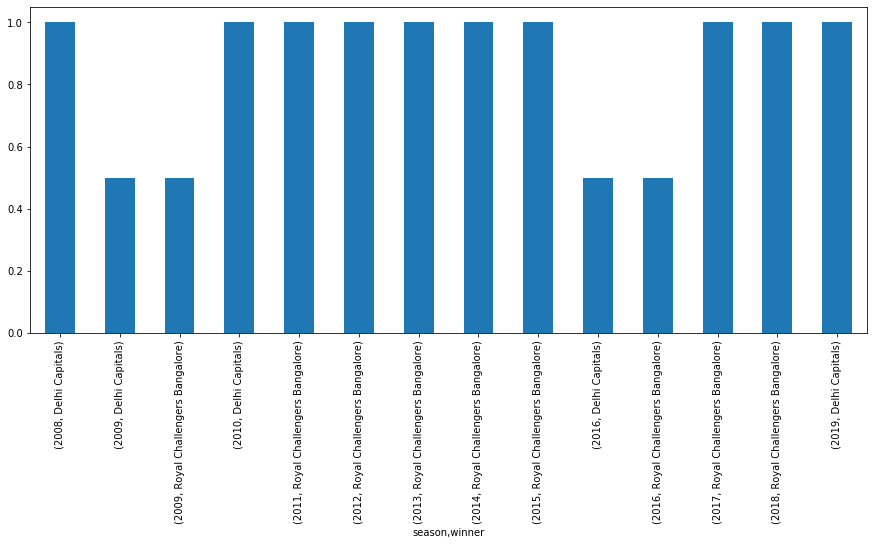

In [8]:
#getting matches between dc nad rcb matchwise
dc_rcb_matches.groupby('season')['winner'].value_counts(normalize=True).plot(kind='bar', figsize=(15,6))

In [9]:
def get_season_winpercent(team_name):
    """
    takes team name as input and returns season wise winning percent
    """

    #count matches played by dc
    get_matches = matches[(matches.team1==team_name)|(matches.team2==team_name)]

    #getting matches played by team per season
    matches_played = get_matches.groupby('season')['id'].count().reset_index()
    matches_played = matches_played.rename(columns={'id': 'tot_matches_played' })

    #getting matches won by team per season
    matches_won = matches[matches.winner==team_name].groupby('season')['id'].count().reset_index()
    matches_won = matches_won.rename(columns={'id': 'tot_matches_won' })

    matches_wins = matches_played.merge(matches_won, on='season')
    matches_wins['winning_percent'] = matches_wins.tot_matches_won/matches_wins.tot_matches_played*100
    return matches_wins[['season', 'winning_percent']]

In [10]:
#get winning percent of dc per season
dc_winp = get_season_winpercent('Delhi Capitals')

#get winning percent of rcb per season
rcb_winp = get_season_winpercent('Royal Challengers Bangalore')


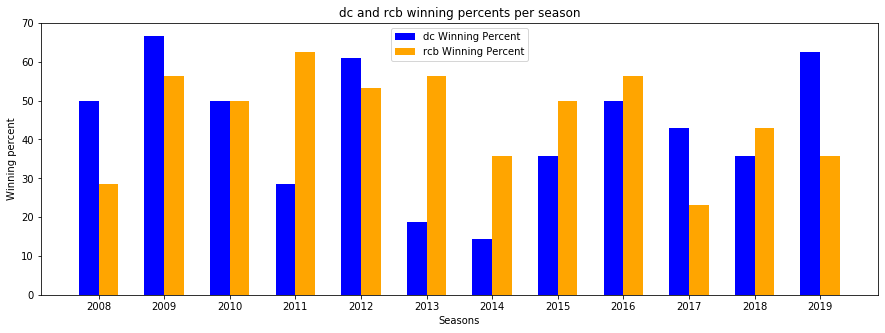

In [11]:
#checking visually
width=0.30
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(dc_winp.season-width/2, dc_winp.winning_percent, width , color='b', label='dc Winning Percent')
ax.bar(rcb_winp.season+width/2, rcb_winp.winning_percent, width,  color='orange', label='rcb Winning Percent')
plt.xlabel("Seasons")
plt.ylabel("Winning percent")
plt.title("dc and rcb winning percents per season")
plt.xticks(np.arange(2008,2020))
plt.legend()
plt.show()

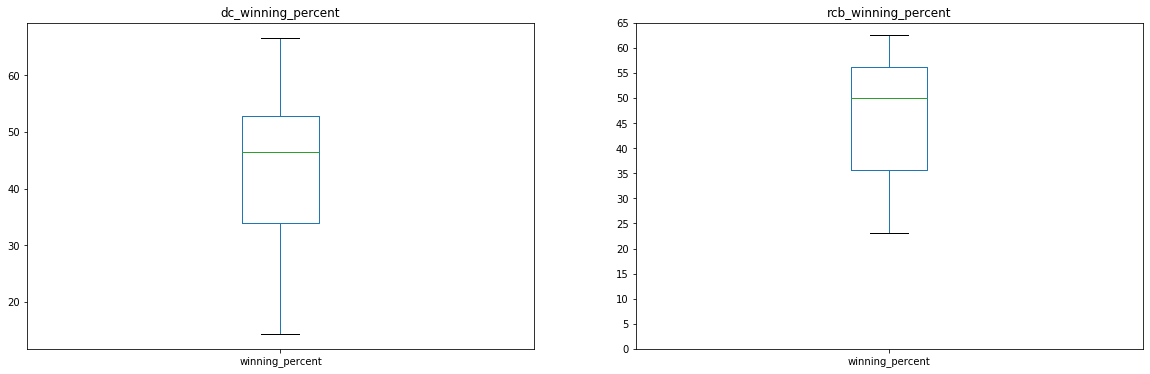

In [12]:
#checking visually
fig, ax = plt.subplots(1,2, figsize=(20,6))
dc_winp.winning_percent.plot('box', ax=ax[0], title='dc_winning_percent')
rcb_winp.winning_percent.plot('box', ax=ax[1], title='rcb_winning_percent')
plt.yticks(ticks=[0,5,10,15,20,25,30,35,40,45,50,55,60,65]);

**Inference:**
    If we check both teams season wise wins RCB seems to have higher winning percent however DC has been close enough and sometimes performed better than RCB . However if check overall wins and average of winning percent RCB has significantly higher winning percent than DC.

###  2. How many batsmen in the match, from both the teams, will have a strike rate more than 130 and hit more than 3 boundaries of which, at least two boundaries should be 4's? Only those batsman who play more than 10 balls will be considered. If no batsman has a strike rate above 130 (or) has a SR above 130 but hasn't hit more than 3 boundaries (or) has a SR above 130 and hit more than 3 boundaries but hasnt hit atleast 2 fours (or) hasn't played more than 10 balls, then the first option will be considered as the answer?

In [13]:
#get all matches between dc and rcb
dc_rcb_all = deliveries[((deliveries.bowling_team=='Delhi Capitals')&(deliveries.batting_team=='Royal Challengers Bangalore'))|((deliveries.bowling_team=='Royal Challengers Bangalore')&(deliveries.batting_team=='Delhi Capitals'))]

In [31]:
# get all players who hit more than 10 balls
dc_rcb_ball10 = matchwise_batsman_strikerate(dc_rcb_all)

#getting all batsman whose strike rate was more than 130
dc_rcb_sr130 = dc_rcb_ball10[dc_rcb_ball10.strike_rate>130]


In [ ]:
# get all boundaries as 4 and boundary count of the players
dc_rcb_4s = matchwise_batsman_get4(dc_rcb_all)

#filter only batsman who hit atleast 2 4's
dc_rcb_min2_4s = dc_rcb_4s[dc_rcb_4s.boundary_4_count >= 2]

#mege atleast 2 4's df with all boundary counts df
dc_rcb_boundaries = dc_rcb_4s.merge(matchwise_batsman_boundaries(dc_rcb_all), on=['match_id','batsman'])

#filter rows where boundary count is min 3 
dc_rcb_min3_boundaries = dc_rcb_boundaries[dc_rcb_boundaries.boundary_count >= 3]


In [38]:
# getting all batsman who match all the conditions
dc_rcb_conditions = dc_rcb_sr130.merge(dc_rcb_min3_boundaries, on=['match_id', 'batsman'])

dc_rcb_conditions_met = dc_rcb_conditions.groupby('match_id').count()['batsman']

dc_rcb_conditions_met

match_id
5        2
55       3
76       5
104      2
129      3
167      2
197      4
209      3
263      3
312      3
372      7
401      3
438      6
459      2
495      4
543      2
571      2
587      4
632      2
7912     4
7938     4
11311    4
11337    9
Name: batsman, dtype: int64

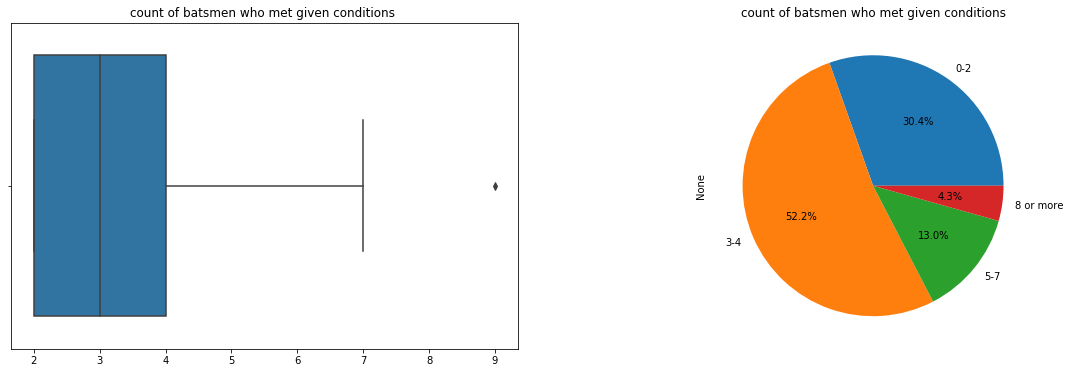

In [113]:
# checking plots

#checking as per options visually
fig, ax= plt.subplots(1,2, figsize=(20,6))

ax[0].set_title('count of batsmen who met given conditions ')
sns.boxplot(dc_rcb_conditions_met.values, ax=ax[0])

pd.cut(dc_rcb_conditions_met.values, bins=[0,2, 4, 7, 21], labels=['0-2', '3-4', '5-7', '8 or more']).value_counts().plot("pie", autopct='%1.1f%%', title='count of batsmen who met given conditions', ax=ax[1]);

**Inference:**
    If we check batsman who match all conditions and count such batsman per match and take an average of the count we get 3 such batsman also if we check probability option wise highest probability is that we get  3-4 such batsman with 52.2% odds.

## 3. How many balls will Kagiso Rabada take, to get his first wicket?

 * 0-6
 * 7-12
 * 13-18
 * 19-24 (or) he won't get a wicket

In [67]:
def bowler_first_wicket(df, bowler_name):
    
    # filter rows when Kagiso Rabada was bowling
    bowler_bowls = df[df.bowler==bowler_name]

    first_wickets = []

    # get matchwise first wicket
    for mid in bowler_bowls.match_id.unique():
        df1 = (bowler_bowls[bowler_bowls.match_id==mid])

        # get list of player_dismissed
        l = (df1.player_dismissed.notnull().tolist())

        #get index when first wicket was taken and update the first_wicket list
        first_wickets.append(l.index(True)+1)

    return first_wickets

In [69]:
print("balls taken to get first wicket")
krabada_first_wickets = bowler_first_wicket(dc_rcb_all,'K Rabada')
krabada_first_wickets

balls taken to get first wicket


[7, 11]

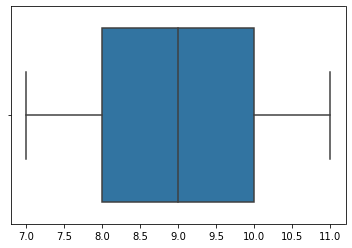

In [70]:
#checking visually
sns.boxplot(krabada_first_wickets)

**Inference:**
    well we have only 2 matches to count however if we check average of balls taken to get first wicket is around 9 balls so its safe to say rabada might get his wicket between 7-12 bowls.


### 4. How many bowlers in the match will have an economy rate less than 8, bowl more than 8 dot balls and give away less than 4 boundaries? Consider only those bowlers who bowl more than 2 overs in the match. If no bowler has an economy rate of less than 8 (or) has an ER< 8 but hasn't bowled more than 8 dots (or) has an ER<8, bowled more than 8 dots, but has given 4 or more boundaried, then the first option will be considered as the answer.

    * 0-1
    * 2-3
    * 4-5
    * 6 or more

In [76]:
#cond 1

# get economy rate of bowlers
bowlers_econrate = economy_rate(dc_rcb_all)

# filter rows where economy rate < 8
bowlers_econrate_less8 = bowlers_econrate[bowlers_econrate.economy_rate<8]

#filter bowlers who have bowled more than 2 overs
bowlers_econrate_less8_o2 = bowlers_econrate_less8[bowlers_econrate_less8.over>2]

In [79]:
#condn 2

# get boundaries given away by the bowler
bowler_gave_boundary = matchwise_bowler_gaveboundaries(dc_rcb_all)

#filter bowlers who give away less than 4 boundaries
bowler_gave_boundary_4less = bowler_gave_boundary[bowler_gave_boundary.boundary_counts < 4]

In [84]:
# condn 3

# get rows when bowler bowls more than 8 dot balls
bowler_dot_ball = get_dot_balls(dc_rcb_all)

# filter bowlers who bowled more than 8 dot balls
bowler_dot_ball_8more = bowler_dot_ball[bowler_dot_ball.total_dots > 8]

In [95]:
# get bowlers who match all the given conditions
bowlers_conditions_met = bowlers_econrate_less8_o2.merge(bowler_gave_boundary_4less, on=['match_id', 'bowler']).merge(bowler_dot_ball_8more, on=['match_id', 'bowler'])

bowlers_conditions_met_count = bowlers_conditions_met.groupby('match_id').count()['bowler']

pd.cut(bowlers_conditions_met_count.values, bins=[0,2,4,6,10]).value_counts()

(0, 2]     11
(2, 4]      7
(4, 6]      0
(6, 10]     0
dtype: int64

In [ ]:
bowlers_conditions_met_count.describe()

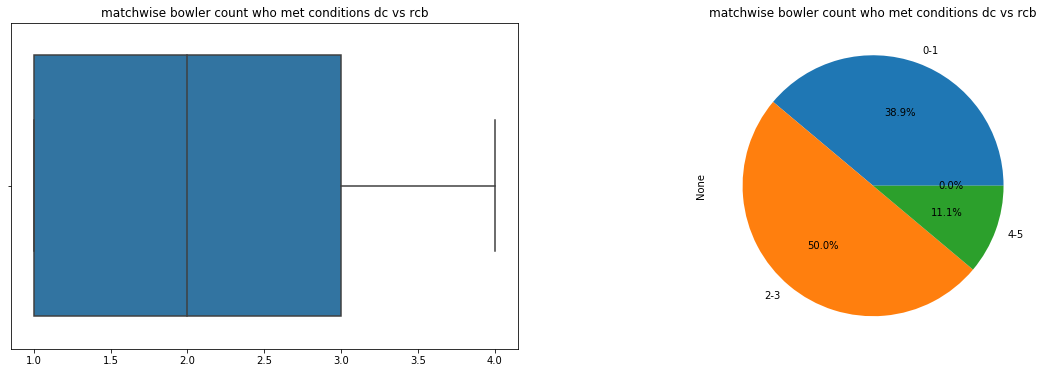

In [114]:
# checking plots

#checking as per options visually
fig, ax= plt.subplots(1,2, figsize=(20,6))

ax[0].set_title('matchwise bowler count who met conditions dc vs rcb')
sns.boxplot(bowlers_conditions_met_count.values, ax=ax[0])

pd.cut(bowlers_conditions_met_count.values, bins=[0,1,3,5,10], labels=['0-1', '2-3', '4-5', '6 or more']).value_counts().plot("pie", autopct='%1.1f%%', title='matchwise bowler count who met conditions dc vs rcb', ax=ax[1]);

**Inference:**
    If we check the conditions and count bowlers who meet the conditions matchwise and take average of the count we get around 2. also by checking given option wise probability, highest odds are to have 2-3  such bowlers in the match with 50% odd.